# Black Body Distributions Integrated with Wavelengths from y-band Data #

Selected LSST y-band Transmission Plot data from http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?mode=browse&gname=LSST&asttype=
Unloaded ascii data file. 1st column is wavelength in Angstroms, 2nd column is transmission (which is dimensionless and the probability of photon passing through). Integrated black body distributions with different temperatures with these wavelengths given.

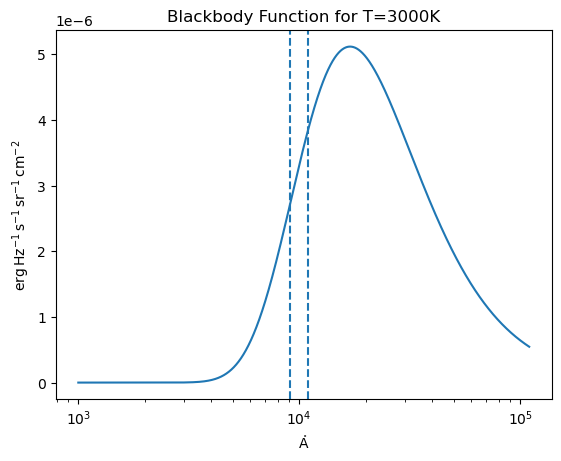

1905.0
7.605843382122721e-26 erg / (Hz s sr cm2) 1.1130366729248936e-25 erg / (Hz s sr cm2)
1.774003959791302e-22 erg / (Hz s sr cm2)
2.3653386131028255e-22 erg / (Hz s sr cm2)
2.9566732664143484e-22 erg / (Hz s sr cm2)


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Blackbody imports 
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

# Read the text file into a DataFrame
data = pd.read_csv('LSST_LSST.y.txt', sep=' ', header=None, names=['Wavelength', 'Transmission'])

# wavelength in Angstrom
column1 = data['Wavelength']
# Probability of photon going through
column2 = data['Transmission']

fig, ax = plt.subplots()
wavelengths = column1*u.AA
y = column2
# ax.plot(x, y)
full_wav = np.arange(1000, 110000) * u.AA


# Blackbody function 

# Temp = 3000K
bb_3000 = BlackBody(temperature=3000*u.K)
full_flux = bb_3000(full_wav)
flux_3000 = bb_3000(wavelengths)
flux_sum_3000 = integrate.trapezoid(flux_3000, x=wavelengths)

# ax.set_xlabel("Wavelengths ($\AA$)")
# ax.set_ylabel("Flux ")
with quantity_support():
    ax.set_title("Blackbody Function for T=3000K")
    # ax.semilogx(wavelengths, flux_3000)
    ax.semilogx(full_wav, full_flux)
    plt.axvline(wavelengths[0], ls='--')
    plt.axvline(wavelengths[len(wavelengths)-1], ls='--')
    # plt.axvline(wavelengths[-1], ls='--')
    plt.show()
# ax.plot(wavelengths, flux_3000)
# ax.set_xscale("log")

# Temp = 4000K
bb_4000 = BlackBody(temperature=4000*u.K)
flux_4000 = bb_4000(wavelengths)
flux_sum_4000 = integrate.trapezoid(flux_4000, x=wavelengths)

# Temp = 5000K
bb_5000 = BlackBody(temperature=5000*u.K)
flux_5000 = bb_5000(wavelengths)
flux_sum_5000 = integrate.trapezoid(flux_5000, x=wavelengths)

print(wavelengths[len(wavelengths)-1]-wavelengths[0])
print(flux_3000[0], flux_3000[-1])
print(flux_sum_3000)
print(flux_sum_4000)
print(flux_sum_5000)
